In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
data = pd.read_csv("1553768847-housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [31]:
# Checking null values

In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
# Fill missing values in 'total_bedrooms' with the median
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

In [7]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [32]:
# Summary Statistics

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Relational Graph Function
def plot_scatter_relation():
    """
    Creates a scatter plot to visualize the relationship between median income and median house value.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5, c=data['median_income'], cmap='viridis')
    plt.colorbar(label="Median Income")
    plt.title("Median Income vs Median House Value")
    plt.xlabel("Median Income")
    plt.ylabel("Median House Value")
    plt.grid(True)
    plt.show()

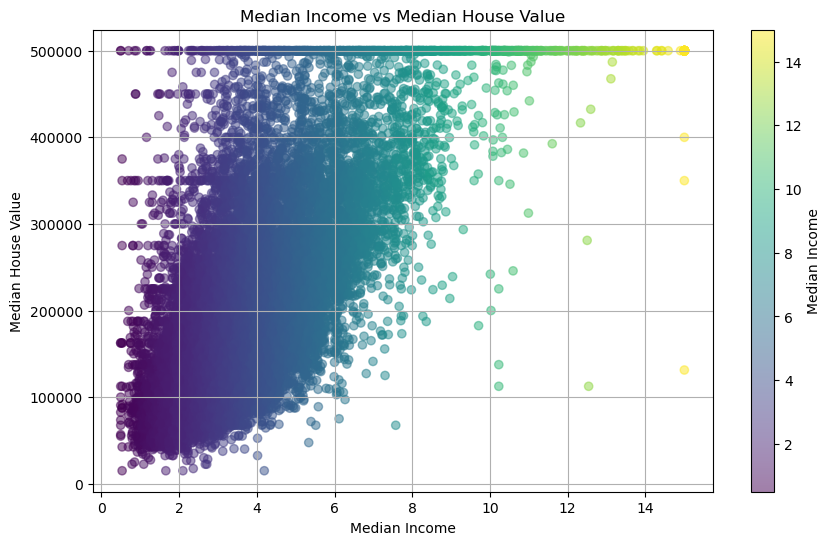

In [12]:
plot_scatter_relation()

In [10]:
# Categorical Graph Function
def plot_categorical_distribution():
    """
    Creates a bar chart to display the count of houses in each ocean proximity category.
    """
    plt.figure(figsize=(8, 5))
    sns.countplot(x="ocean_proximity", data=data, palette="coolwarm")
    plt.title("Distribution of Ocean Proximity")
    plt.xlabel("Ocean Proximity")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

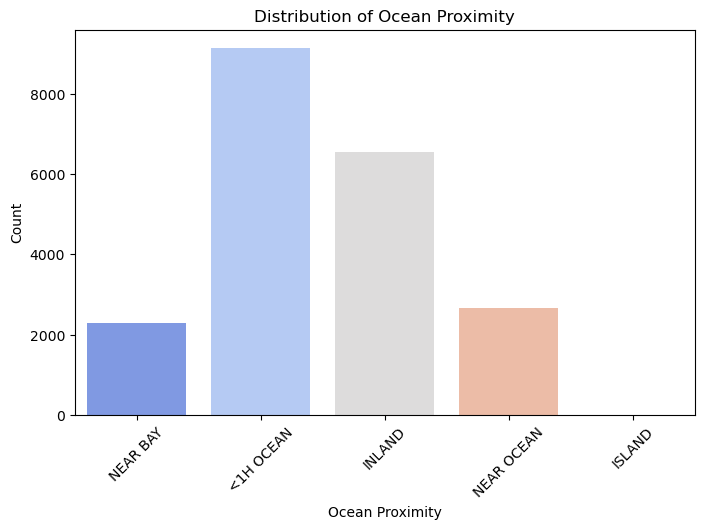

In [13]:
plot_categorical_distribution()

In [16]:
# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [17]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1,84700


In [18]:
# Correlation heatmap
def plot_correlation_heatmap():
    """
    Creates a correlation heatmap for the numerical features in the dataset.
    """
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

    # Customize the plot
    plt.title("Correlation Heatmap")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

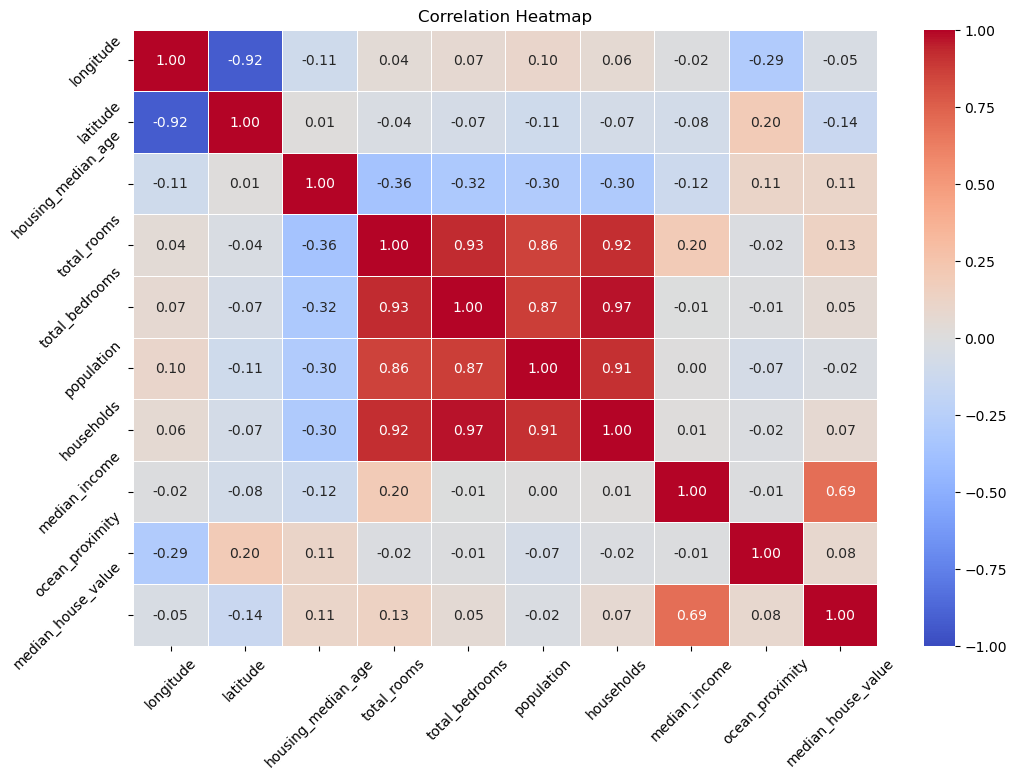

In [19]:
plot_correlation_heatmap()

In [33]:
# Statistics

In [20]:
mean = data['median_house_value'].mean()
median = data['median_house_value'].median()
std_dev = data['median_house_value'].std()
skewness = data['median_house_value'].skew()
kurtosis = data['median_house_value'].kurt()
print(f"Mean: {mean}, Median: {median}, Standard Deviation: {std_dev}, Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: 206855.81690891474, Median: 179700.0, Standard Deviation: 115395.6158744132, Skewness: 0.9777632739098341, Kurtosis: 0.3278702429465872


In [21]:
# Elbow Plot Function
def plot_elbow_curve():
    """
    Creates an elbow plot to determine the optimal number of clusters for KMeans.
    """
    coords = data[['latitude', 'longitude']].dropna()
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(coords)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
    plt.title("Elbow Plot for Optimal K (Clusters)")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia (Within-cluster Sum of Squares)")
    plt.grid(True)
    plt.show()

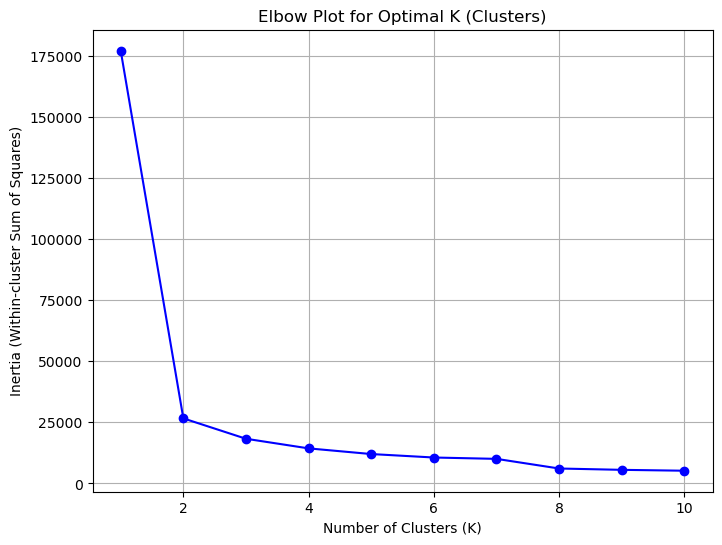

In [22]:
plot_elbow_curve()

In [23]:
# Clustering Function
def perform_clustering():
    """
    Performs K-means clustering on the dataset based on latitude and longitude.
    """
    coords = data[['latitude', 'longitude']].dropna()
    kmeans = KMeans(n_clusters=2, random_state=42)
    data['cluster'] = kmeans.fit_predict(coords)
    print("Cluster Centers:\n", kmeans.cluster_centers_)
    return kmeans

In [25]:
perform_clustering()

Cluster Centers:
 [[  33.93924372 -118.00637521]
 [  37.95483333 -121.71523908]]


KMeans(n_clusters=2, random_state=42)

In [24]:
# KMeans Visualization Function
def plot_kmeans_clusters():
    """
    Visualizes the KMeans clustering result on a 2D plot (latitude vs longitude).
    """
    coords = data[['latitude', 'longitude']].dropna()
    kmeans = KMeans(n_clusters=5, random_state=42)
    data['cluster'] = kmeans.fit_predict(coords)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='longitude', y='latitude', hue='cluster', palette="Set2", data=data, s=50, alpha=0.7)
    plt.title("KMeans Clustering: Latitude vs Longitude")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(title="Cluster")
    plt.show()


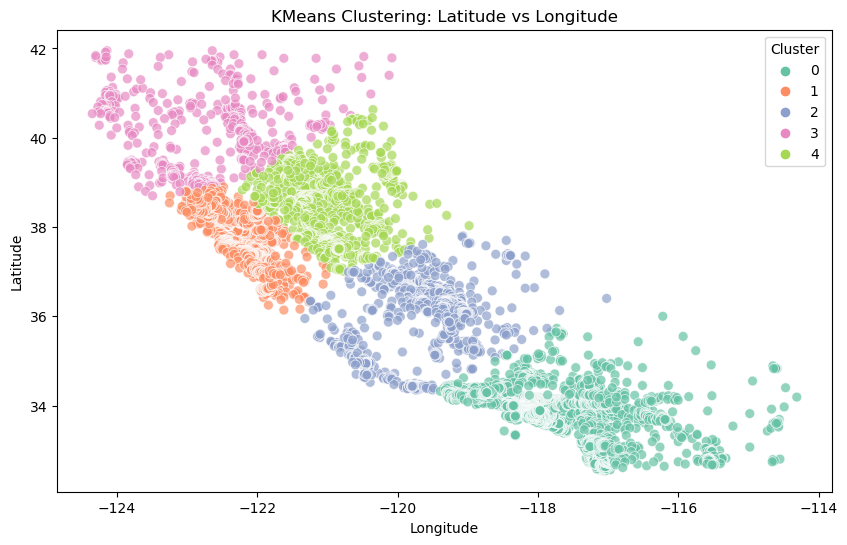

In [26]:
plot_kmeans_clusters()

In [27]:
# Fitting Function
def perform_linear_fitting():
    """
    Fits a linear regression model between median income and median house value.
    """
    X = data[['median_income']].values
    y = data['median_house_value'].values
    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    print(f"R-squared: {r2}, Mean Squared Error: {mse}")
    return model, r2, mse

In [28]:
perform_linear_fitting()

R-squared: 0.47344749180719903, Mean Squared Error: 7011311502.929527


(LinearRegression(), 0.47344749180719903, 7011311502.929527)

In [29]:
# Confidence Interval Plot Function
def plot_linear_fit():
    """
    Plots the linear fit with confidence intervals and error bars.
    """
    X = data[['median_income']].values
    y = data['median_house_value'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label='Data Points')
    plt.plot(X, y_pred, color='red', label='Linear Fit', linewidth=2)
    plt.title("Linear Fit: Median Income vs Median House Value")
    plt.xlabel("Median Income")
    plt.ylabel("Median House Value")
    plt.legend()
    plt.show()

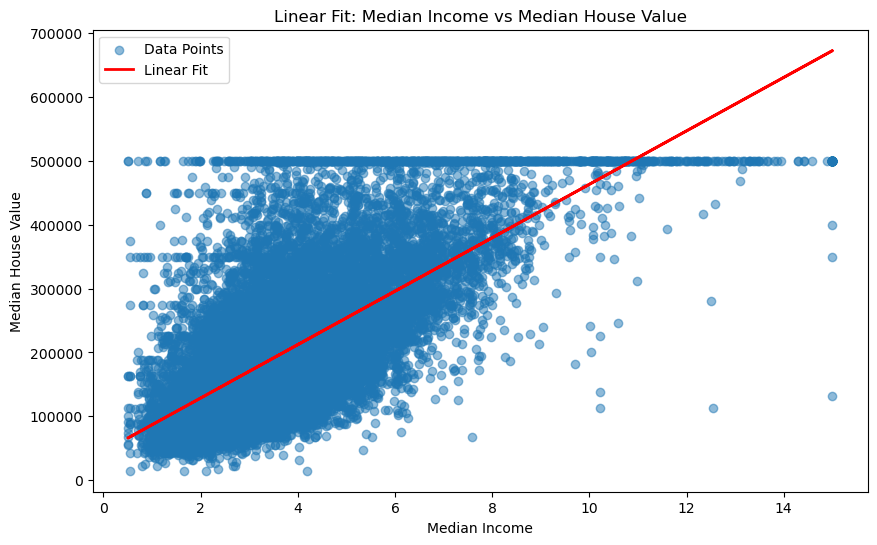

In [30]:
plot_linear_fit()